In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv("50_startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
dataset.State.describe().top

'New York'

In [8]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
dataset.State.describe().freq

17

In [11]:
dataset.duplicated().sum()

0

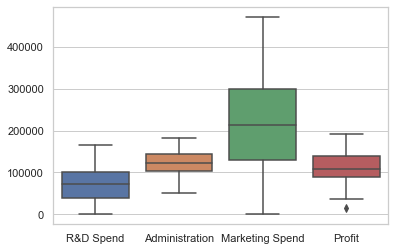

In [12]:
sns.set(style="whitegrid")
ax=sns.boxplot(data=dataset,orient="v")

In [15]:
Q1=dataset.Profit.quantile(0.25)
Q3=dataset.Profit.quantile(0.75)
IQR=Q3-Q1
ind=dataset.loc[(dataset.Profit<Q1-1.5*IQR)]
outliers=ind.Profit
print("on a {} valeurs aberrantes qui sont :\ n{}".format(ind.shape[0],outliers))


on a 1 valeurs aberrantes qui sont :\ n49    14681.4
Name: Profit, dtype: float64


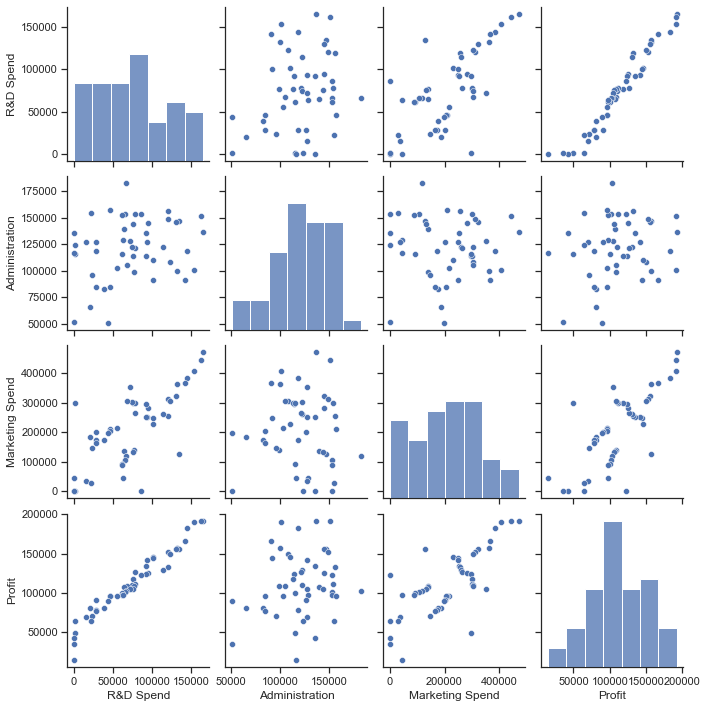

In [16]:
sns.set(style="ticks")
sns.pairplot(dataset)

<AxesSubplot:>

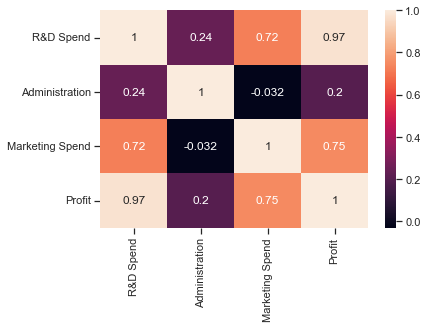

In [17]:
correlations =dataset.corr(method='pearson')
sns.heatmap(correlations, annot=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
dataset.iloc[:,3]=labelencoder_x.fit_transform(dataset.iloc[:,3])
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [23]:
x=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values

In [24]:
x.shape

(50, 4)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
x_train.shape

(40, 4)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train_sc =scaler.fit_transform(x_train)
x_test_sc =scaler.transform(x_test)
scaler2=MinMaxScaler()
y_train_sc = scaler2.fit_transform(y_train.reshape(-1,1))
y_test_sc = scaler2.transform(y_test.reshape(-1,1))


In [28]:
x_train_sc[2,:]

array([0.45557444, 0.87258866, 0.28413435, 0.5       ])

In [29]:
y_train_sc[2]

array([0.51273747])

In [30]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [31]:
model.intercept_

42658.087123248944

In [32]:
model.coef_

array([7.77203690e-01, 3.02432445e-02, 3.49236072e-02, 3.15877202e+02])

In [34]:
y_pred = model.predict(x_test)

In [35]:
y_test-y_pred

array([  -677.02508021,  11860.66763306,  12592.91209852,   4840.54631686,
        11515.60262834, -10525.31584099,  13752.10152117,  -1020.80199396,
        -4436.91083781,  -2784.27909945])

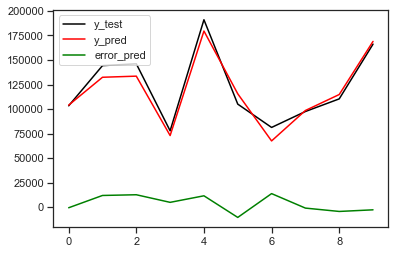

In [36]:
plt.plot(y_test, color='black')
plt.plot(y_pred, color='red')
plt.plot(y_test-y_pred, color='green')
plt.legend(['y_test','y_pred','error_pred'], loc="best")

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, \
r2_score , mean_absolute_percentage_error
mean_squared_error(y_test, y_pred)

78413822.17201321

In [38]:
mean_absolute_percentage_error(y_test, y_pred)

0.06344130977384702

In [40]:
from joblib import dump
dump(model,'mon_modele.joblib')


['mon_modele.joblib']

In [41]:
from joblib import load
modele = load('mon_modele.joblib')
y_pred2 =modele.predict(x_test)

In [42]:
%whos

Variable                         Type                Data/Info
--------------------------------------------------------------
IQR                              float64             49627.07499999998
LabelEncoder                     type                <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LinearRegression                 ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
MinMaxScaler                     type                <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
Q1                               float64             90138.9025
Q3                               float64             139765.97749999998
ax                               AxesSubplot         AxesSubplot(0.125,0.125;0.775x0.755)
correlations                     DataFrame                            R&D Spen<...>       0.747766  1.000000
dataset                          DataFrame               R&D Spend  Administra<...>5173.06      0   14681.40
dump                            

In [43]:
from statsmodels.regression.linear_model import OLS
x= np.append (arr = np.ones ((50,1)),values =x ,axis=1)
x.shape

(50, 5)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
x_train.shape

(40, 5)

In [45]:
model2 = OLS(y_train,x_train)
results =model2.fit()
su=results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.01e-22
Time:                        16:02:29   Log-Likelihood:                -421.17
No. Observations:                  40   AIC:                             852.3
Df Residuals:                      35   BIC:                             860.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.266e+04   8248.360      5.172      0.000    2.59e+04    5.94e+04
x1             0.7772      0.053     14.541      0.000       0.669       0.886
x2             0.0302      0.065      0.464      0.646      -0.102       0.163
x3             0.0349      0.019      1.878      0.069      -0.003       0.073
x4           315.8772   1805.304      0.175      0.862   -3349.085    3980.840
==============================================================================
Omnibus:                       15.306   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.372
Skew:                          -1.087   Prob(JB):                     2.29e-05
Kurtosis:                       5.845   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
results.rsquared,results.rsquared_adj

(0.9500009880362247, 0.9442868152403646)

In [47]:
results.params

array([4.26580871e+04, 7.77203690e-01, 3.02432445e-02, 3.49236072e-02,
       3.15877202e+02])

In [48]:
dataset = pd.read_csv("salary_position.txt", sep='\t')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [50]:
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [53]:
lin_reg =LinearRegression()
lin_reg.fit(x,y)
y_pred=lin_reg.predict(x)

Text(0, 0.5, 'salary')

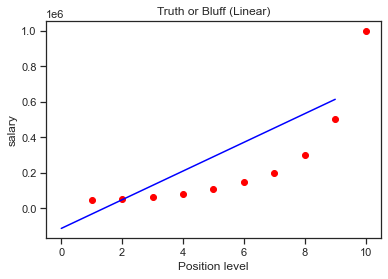

In [58]:
plt.scatter(x,y,color='red')
plt.plot(y_pred,color='blue')
plt.title("Truth or Bluff (Linear)")
plt.xlabel('Position level')
plt.ylabel('salary')
#plt.show()

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)

In [61]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [62]:
lin_reg2 =LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

Text(0, 0.5, 'salary')

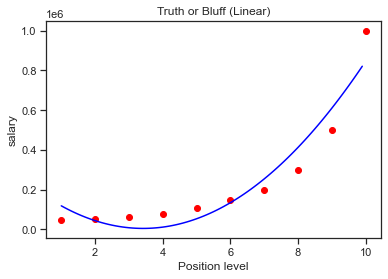

In [64]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
x_grid_poly=poly_reg.fit_transform(x_grid)
y_pred2=lin_reg2.predict(x_grid_poly)
plt.scatter(x,y,color='red')
plt.plot(x_grid,y_pred2,color='blue')
plt.title("Truth or Bluff (Linear)")
plt.xlabel('Position level')
plt.ylabel('salary')
#plt.show()

Text(0, 0.5, 'salary')

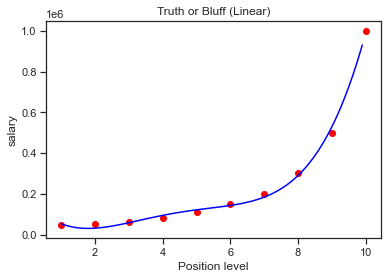

In [68]:
poly_reg =PolynomialFeatures(degree=4)
x_poly =poly_reg.fit_transform(x)
lin_reg4 = LinearRegression()
lin_reg4.fit(x_poly,y)
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
x_grid_poly=poly_reg.fit_transform(x_grid)
y_pred2=lin_reg4.predict(x_grid_poly)
plt.scatter(x,y,color='red')
plt.plot(x_grid,y_pred2,color='blue')
plt.title("Truth or Bluff (Linear)")
plt.xlabel('Position level')
plt.ylabel('salary')
#plt.show()